# Merge multiple Excels into one file (do it once only)

In [3]:
# import os
# import pandas as pd

# # Function to read all Excel files in the current folder and merge them into a single dataframe
# def merge_excel_files_in_current_folder():
#     current_folder = os.getcwd()  # Get the current working directory
#     all_data = []  # Create an empty list to store the dataframes

#     for file in os.listdir(current_folder):
#         if file.endswith(".xlsx"):  # Check if the file is an Excel file
#             file_path = os.path.join(current_folder, file)
#             df = pd.read_excel(file_path)  # Read the Excel file into a DataFrame
#             all_data.append(df)  # Append the DataFrame to the list

#     merged_dataframe = pd.concat(all_data, ignore_index=True)  # Concatenate all DataFrames into one
#     return merged_dataframe

# merged_dataframe = merge_excel_files_in_current_folder()

# # Now, you have all the data from Excel files merged into 'merged_dataframe'
# print(merged_dataframe.sample(10))  # You can print 10 random rows to check the result

# # Export the merged DataFrame to a new Excel file
# output_file_path = "merged_data.xlsx"
# merged_dataframe.to_excel(output_file_path, index=False)

# print(f"Data has been successfully exported to '{output_file_path}'.")

# If using Google Colab - mount drive first (not needed if not using Google Colab)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# Read the merged CSV

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Try reading the file with a different encoding (e.g., 'latin1')
df = pd.read_csv("merged_data_v2.csv", encoding='latin1')

# Display basic information about the dataset
df.info()

C:\Users\lyeyu\AppData\Local\Temp\ipykernel_14248\1039093825.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data_v2.csv", encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404847 entries, 0 to 404846
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Project Name                 404847 non-null  object 
 1   Transacted Price ($)         404847 non-null  object 
 2   Area (SQFT)                  404847 non-null  object 
 3   Unit Price ($ PSF)           404847 non-null  object 
 4   Sale Date                    404847 non-null  object 
 5   Address                      404847 non-null  object 
 6   Type of Sale                 404847 non-null  object 
 7   Type of Area                 404847 non-null  object 
 8   Area (SQM)                   404847 non-null  object 
 9   Unit Price ($ PSM)           404847 non-null  object 
 10  Property Type                404847 non-null  object 
 11  Number of Units              404847 non-null  int64  
 12  Tenure                       404846 non-null  object 
 13 

In [6]:
# Display a sample of 5 rows of the dataset
df.sample(5)

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
52607,DORMER PARK,"2,750,000","1,679.18","1,638",09 Jan 2020,53 JERVOIS ROAD #04-06,Resale,Strata,156,"17,628",Condominium,1,Freehold,1993,Private,249046.0,10,24,Central Region,Tanglin
395946,VACANZA @ EAST,"1,200,000",807.3,"1,486",18 Jul 2023,48 LENGKONG TUJOH #03-33,Resale,Strata,75.0,"16,000",Condominium,1,Freehold,2014,Private,417397.0,14,41,East Region,Bedok
164000,CASA CAMBIO,"701,600",473.62,"1,481",14 Mar 2012,9 LIM TUA TOW ROAD #05-03,New Sale,Strata,44,"15,945",Condominium,1,Freehold,Uncompleted,Private,547726.0,19,54,North East Region,Serangoon
356327,REFLECTIONS AT KEPPEL BAY,"1,525,131","1,108.69","1,376",31 Jul 2007,15 KEPPEL BAY VIEW #02-55,New Sale,Strata,103,"14,807",Condominium,1,99 yrs from 15/03/2006,Uncompleted,Private,98410.0,4,9,Central Region,Bukit Merah
109640,THE MAYFAIR,"738,000","1,205.57",612,25 Sep 2009,7 JURONG EAST STREET 32 #06-06,Resale,Strata,112,"6,589",Condominium,1,99 yrs from 04/12/1996,2000,HDB,609480.0,22,60,West Region,Jurong East


In [7]:
# Check data types of columns
df.dtypes

Project Name                    object
Transacted Price ($)            object
Area (SQFT)                     object
Unit Price ($ PSF)              object
Sale Date                       object
Address                         object
Type of Sale                    object
Type of Area                    object
Area (SQM)                      object
Unit Price ($ PSM)              object
Property Type                   object
Number of Units                  int64
Tenure                          object
Completion Date                 object
Purchaser Address Indicator     object
Postal Code                    float64
Postal District                  int64
Postal Sector                    int64
Planning Region                 object
Planning Area                   object
dtype: object

# Remove rows with unwanted data
## Remove rows where “Project Name” is “N.A.”
## Remove rows where “Number of Units” is greater than 1 because mostly likely are en bloc single transactions
## Drop col “Number of Units” because all values are now “1”

In [8]:
# Remove rows where "Project Name" is "N.A."
df = df[df["Project Name"] != "N.A."]

# Remove rows where "Number of Units" is greater than 1
df = df[df["Number of Units"] <= 1]

# Drop the "Number of Units" column
df = df.drop(columns=["Number of Units"])

# Remove rows where "Tenure" or "Postal Code" are null
df = df.dropna(subset=["Tenure", "Postal Code"])

In [9]:
# check for null values for each column
df.isna().sum()

Project Name                   0
Transacted Price ($)           0
Area (SQFT)                    0
Unit Price ($ PSF)             0
Sale Date                      0
Address                        0
Type of Sale                   0
Type of Area                   0
Area (SQM)                     0
Unit Price ($ PSM)             0
Property Type                  0
Tenure                         0
Completion Date                0
Purchaser Address Indicator    0
Postal Code                    0
Postal District                0
Postal Sector                  0
Planning Region                0
Planning Area                  0
dtype: int64

In [10]:
# # export to csv
# df.to_csv('merged_data_v3.csv')

# Check for duplicates of rows

In [11]:
# Removing duplicate rows from the dataset while keeping the first occurrence
df_deduplicated = df.drop_duplicates()

# Number of rows before and after removing duplicates
rows_before = df.shape[0]
rows_after = df_deduplicated.shape[0]

rows_before, rows_after

(401986, 401986)

# Check for presence of "-" as a string which essentially is NaN (but undetected)

In [12]:
# Checking for the presence of "-" in each column and counting its occurrence
dash_counts = (df == "-").sum()

# Sorting the results to see in which columns "-" appears the most
dash_counts_sorted = dash_counts.sort_values(ascending=False)
dash_counts_sorted.head(25)  # Displaying the top 10 columns with most "-" occurrences

Completion Date                4234
Type of Area                     11
Project Name                      0
Property Type                     0
Planning Region                   0
Postal Sector                     0
Postal District                   0
Postal Code                       0
Purchaser Address Indicator       0
Tenure                            0
Unit Price ($ PSM)                0
Transacted Price ($)              0
Area (SQM)                        0
Type of Sale                      0
Address                           0
Sale Date                         0
Unit Price ($ PSF)                0
Area (SQFT)                       0
Planning Area                     0
dtype: int64

In [13]:
# Count the number of rows before removal
rows_before = df.shape[0]

# Remove rows that contain any dashes ("-")
df_cleaned = df[~(df == "-").any(axis=1)]

# Count the number of rows after removal
rows_after = df_cleaned.shape[0]

# Calculate the number of rows removed
rows_removed = rows_before - rows_after

print(f"Rows before removal: {rows_before}")
print(f"Rows after removal: {rows_after}")
print(f"Rows removed: {rows_removed}")

Rows before removal: 401986
Rows after removal: 397741
Rows removed: 4245


In [14]:
df_cleaned.dtypes

Project Name                    object
Transacted Price ($)            object
Area (SQFT)                     object
Unit Price ($ PSF)              object
Sale Date                       object
Address                         object
Type of Sale                    object
Type of Area                    object
Area (SQM)                      object
Unit Price ($ PSM)              object
Property Type                   object
Tenure                          object
Completion Date                 object
Purchaser Address Indicator     object
Postal Code                    float64
Postal District                  int64
Postal Sector                    int64
Planning Region                 object
Planning Area                   object
dtype: object

In [15]:
# Assign the cleaned dataframe back to df
df = df_cleaned

# Convert numbers stored as strings with commas to float

In [16]:
# Remove commas and convert columns to numeric types
columns_to_convert = ["Transacted Price ($)", "Area (SQFT)", "Unit Price ($ PSF)", "Area (SQM)", "Unit Price ($ PSM)"]

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype(float)

In [17]:
df.dtypes

Project Name                    object
Transacted Price ($)           float64
Area (SQFT)                    float64
Unit Price ($ PSF)             float64
Sale Date                       object
Address                         object
Type of Sale                    object
Type of Area                    object
Area (SQM)                     float64
Unit Price ($ PSM)             float64
Property Type                   object
Tenure                          object
Completion Date                 object
Purchaser Address Indicator     object
Postal Code                    float64
Postal District                  int64
Postal Sector                    int64
Planning Region                 object
Planning Area                   object
dtype: object

# Convert postal_code to strings in 6-digit format with zero in front

In [18]:
# Converting 'Postal Code' to a string format, ensuring 6-digit codes (including leading zeros)
df['Postal Code'] = df['Postal Code'].apply(lambda x: f"{int(x):06d}" if pd.notna(x) else x)

In [19]:
# Verify the change
df.sample(5)

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Property Type,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
396622,WEST BAY CONDOMINIUM,1338000.0,1216.33,1100.0,06 Nov 2023,56 WEST COAST CRESCENT #04-07,Resale,Strata,NaN,11841.0,Condominium,99 yrs from 01/03/1991,1993,HDB,128038,5,12,West Region,Clementi
38812,ATTITUDE AT KIM YAM,450000.0,365.98,1230.0,05 May 2009,1 KIM YAM ROAD #07-01,New Sale,Strata,34.0,13235.0,Apartment,999 yrs from 01/07/1841,Uncompleted,Private,239319,9,23,Central Region,River Valley
55632,THE GRANGE,2345288.0,1743.77,1345.0,23 Aug 2005,1 GRANGE GARDEN #09-04,New Sale,Strata,162.0,14477.0,Condominium,Freehold,Uncompleted,Private,249631,10,24,Central Region,River Valley
23525,TEN @ SUFFOLK,1530000.0,1087.16,1407.0,07 Nov 2019,10 SUFFOLK ROAD #07-02,Resale,Strata,101.0,15149.0,Apartment,Freehold,2006,Private,307786,11,30,Central Region,Novena
284353,PARK COLONIAL,827000.0,462.85,1787.0,11 Jul 2018,8 WOODLEIGH LANE #07-28,New Sale,Strata,43.0,19233.0,Condominium,99 yrs from 11/10/2017,Uncompleted,Private,357688,13,35,Central Region,Toa Payoh


In [20]:
# # export to CSV
# df.to_csv('merged_data_v4.csv', index=False)

In [21]:
df.dtypes

Project Name                    object
Transacted Price ($)           float64
Area (SQFT)                    float64
Unit Price ($ PSF)             float64
Sale Date                       object
Address                         object
Type of Sale                    object
Type of Area                    object
Area (SQM)                     float64
Unit Price ($ PSM)             float64
Property Type                   object
Tenure                          object
Completion Date                 object
Purchaser Address Indicator     object
Postal Code                     object
Postal District                  int64
Postal Sector                    int64
Planning Region                 object
Planning Area                   object
dtype: object

# Convert date stored as strings to date data type

In [22]:
# Converting 'Sale Date' from string to datetime data type
df['Sale Date'] = pd.to_datetime(df['Sale Date'], errors='coerce')

In [23]:
df.sample(5)

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Property Type,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
244752,SUNHAVEN,970000.0,990.29,980.0,2018-10-10,781 UPPER CHANGI ROAD EAST #07-11,Resale,Strata,92.0,10543.0,Condominium,Freehold,2002,Private,486069,16,48,East Region,Tampines
294362,CANNINGHILL PIERS,2362000.0,861.12,2743.0,2021-11-20,5 CLARKE QUAY #07-21,New Sale,Strata,80.0,29525.0,Apartment,99 yrs from 17/09/2021,Uncompleted,HDB,179884,6,17,Central Region,Singapore River
318766,VISTA RESIDENCES,845000.0,635.08,1331.0,2011-04-27,26 JALAN DATOH #04-01,Sub Sale,Strata,59.0,14322.0,Condominium,Freehold,Uncompleted,HDB,329425,12,32,Central Region,Novena
387071,HARVEST MANSIONS,900000.0,1076.40,836.0,2008-06-17,550 HAVELOCK ROAD #08-04,Resale,Strata,100.0,9000.0,Apartment,99 yrs from 17/11/1993,1996,Private,169638,3,16,Central Region,Bukit Merah
26879,RICHMOND PARK,3900000.0,1733.00,2250.0,2010-03-10,3 BIDEFORD ROAD #10-03,Resale,Strata,161.0,24224.0,Condominium,Freehold,1996,Private,229920,9,22,Central Region,Newton


In [24]:
df.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure                                 object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                            object
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
dtype: object

In [25]:
# # export to CSV
# df.to_csv('merged_data_v5.csv', index=False)

# Create new column "Tenure_cat" based on the criteria specified for the "Tenure" column. In this new column:
## "Freehold" is assigned for "Freehold" tenures and those with years between 800 to 1000.
## "Leasehold" is assigned for tenures with years between 80 to 150.

In [26]:
# Function to categorize tenure
def categorize_tenure(tenure):
    if tenure == "Freehold":
        return "Freehold"
    else:
        try:
            # Extracting the number of years from the tenure string
            years = int(tenure.split(' ')[0])
            if 80 <= years <= 150:
                return "Leasehold"
            elif 800 <= years <= 1000:
                return "Freehold"
        except:
            pass
    return None

# Applying the function to create the new 'Tenure_cat' column
df['Tenure_cat'] = df['Tenure'].apply(categorize_tenure)

In [27]:
# Checking sample rows of the updated dataframe
df[['Tenure', 'Tenure_cat']].sample(5)

,Tenure,Tenure_cat
117234,Freehold,Freehold
43193,999 yrs from 21/06/1877,Freehold
317452,Freehold,Freehold
15361,Freehold,Freehold
262518,Freehold,Freehold


In [28]:
# # export to CSV
# df.to_csv('merged_data_v6.csv', index=False)

In [29]:
# remove rows for properties with 60 years lease (excluded from analysis)
# Removing rows where 'Tenure' starts with "60 yrs"
rows_before_removal = df.shape[0]
df = df[~df['Tenure'].str.startswith("60 yrs", na=False)]
rows_after_removal = df.shape[0]

# Number of rows removed
rows_removed = rows_before_removal - rows_after_removal
rows_before_removal, rows_after_removal, rows_removed

(397741, 397298, 443)

In [30]:
# # export to CSV
# df.to_csv('merged_data_v7.csv', index=False)

In [31]:
df.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure                                 object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                            object
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
Tenure_cat                             object
dtype: object

# Modify the tenure column to keep freehold, else, take the last 4 char (YYYY) to replace the original string

In [32]:
# Custom function to modify the 'tenure' column
def modify_tenure(row):
    if row != 'Freehold':
        return row[-4:]  # Extract last 4 characters if not 'Freehold'
    else:
        return row  # Keep 'Freehold' as is

# Apply the function to the 'Tenure' column
df.loc[:, 'Tenure'] = df['Tenure'].apply(modify_tenure)

In [33]:
#rename col "Tenure" to "Tenure_start"
df = df.rename(columns={'Tenure': 'Tenure_start'})

In [34]:
df.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure_start                           object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                            object
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
Tenure_cat                             object
dtype: object

In [35]:
# convert dtype for Tenure_start column to year, leaving "Freehold" alone
# Sample function to check and convert values
def convert_year(value):
    try:
        # Try converting to integer (assuming the value is a year in YYYY format)
        return int(value)
    except ValueError:
        # If conversion fails (e.g., the value is "Freehold"), return the original value
        return value

# Applying the function to the 'Tenure_start' column
df['Tenure_start'] = df['Tenure_start'].apply(convert_year)

# Check the first few rows to see the results
print(df['Tenure_start'].sample(5))

58512     Freehold
86828     Freehold
72514         1875
84874     Freehold
398713        2022
Name: Tenure_start, dtype: object


In [36]:
df.sample(5)

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Property Type,Tenure_start,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area,Tenure_cat
190247,Q BAY RESIDENCES,1226340.0,1119.46,1095.0,2013-09-04,9 TAMPINES STREET 86 #12-27,New Sale,Strata,104.0,11792.0,Condominium,2012,Uncompleted,Private,528587,18,52,East Region,Tampines,Leasehold
115456,THE TENNERY,989974.0,882.65,1122.0,2011-01-13,3 WOODLANDS ROAD #11-07,New Sale,Strata,82.0,12073.0,Apartment,2010,Uncompleted,Private,677901,23,67,West Region,Choa Chu Kang,Leasehold
233784,FINLAND GARDENS,2225000.0,1474.67,1509.0,2019-11-15,41 EAST COAST AVENUE #01-04,Resale,Strata,137.0,16241.0,Condominium,Freehold,1984,Private,459246,15,45,East Region,Bedok,Freehold
32482,THE QUAYSIDE,938000.0,1334.74,703.0,2006-06-05,60 ROBERTSON QUAY #08-02,Resale,Strata,124.0,7565.0,Apartment,1994,1998,Private,238252,9,23,Central Region,Singapore River,Leasehold
275211,WATERBANK AT DAKOTA,810000.0,484.38,1672.0,2018-02-05,84 DAKOTA CRESCENT #15-27,Resale,Strata,45.0,18000.0,Condominium,2009,2013,Private,399948,14,39,Central Region,Geylang,Leasehold


# add 3 cols - p/l ($), p/l (%) and transaction num

In [37]:
# Sorting by 'Address' and 'Sale Date' to ensure chronological order for each address
df_sorted = df.sort_values(by=['Address', 'Sale Date'])

# Grouping by 'Address' and calculating profit/loss and percentage change
def calculate_profit_loss(group):
    group = group.sort_values(by='Sale Date')  # Ensuring chronological order
    group['P/L ($)'] = group['Transacted Price ($)'].diff()  # Profit/Loss
    group['P/L (%)'] = group['P/L ($)'] / group['Transacted Price ($)'].shift(1) * 100  # Percentage Change
    group['Transaction number'] = range(1, len(group) + 1)  # Transaction Number
    return group

df_processed = df_sorted.groupby('Address').apply(calculate_profit_loss)

# Resetting index to flatten the dataframe
df_processed.reset_index(drop=True, inplace=True)

# Checking the first few rows of the updated dataframe
df_processed[['Address', 'Sale Date', 'Transacted Price ($)', 'P/L ($)', 'P/L (%)', 'Transaction number']].head()

,Address,Sale Date,Transacted Price ($),P/L ($),P/L (%),Transaction number
0,1 AKYAB ROAD #02-01,2006-07-14,870000.0,NaN,NaN,1
1,1 AKYAB ROAD #02-01,2009-08-17,1680000.0,810000.0,93.103448,2
2,1 AKYAB ROAD #02-01,2011-05-03,2250000.0,570000.0,33.928571,3
3,1 AKYAB ROAD #02-02,2011-05-04,1810888.0,NaN,NaN,1
4,1 AKYAB ROAD #02-02,2021-10-07,2308888.0,498000.0,27.500320,2


In [38]:
df_processed.sample(5)

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area,Tenure_cat,P/L ($),P/L (%),Transaction number
159560,THE GLACIER,1650000.0,1399.32,1179.0,2020-11-05,260 JOO CHIAT PLACE #01-06,Resale,Strata,130.0,12692.0,...,Private,427941,15,42,East Region,Bedok,Freehold,170000.0,11.486486,3
379108,BLOSSOMS BY THE PARK,2094000.0,871.88,2402.0,2023-11-09,9 SLIM BARRACKS RISE #27-09,New Sale,Strata,NaN,25852.0,...,N.A,139742,5,13,Central Region,Queenstown,Leasehold,NaN,NaN,1
206054,KOVAN MELODY,734900.0,1420.85,517.0,2005-05-18,33 KOVAN ROAD #03-38,New Sale,Strata,132.0,5567.0,...,Private,545020,19,54,North East Region,Hougang,Leasehold,NaN,NaN,1
379910,LIV ON WILKIE,1357000.0,527.44,2573.0,2013-11-15,9 WILKIE TERRACE #07-12,New Sale,Strata,49.0,27694.0,...,Private,228025,9,22,Central Region,Rochor,Freehold,NaN,NaN,1
295297,THE CONTINUUM,2742040.0,1065.64,2573.0,2023-05-06,6 THIAM SIEW AVENUE #05-32,New Sale,Strata,NaN,27697.0,...,Private,436844,15,43,Central Region,Geylang,Freehold,0.0,0.000000,2


In [39]:
# # export to CSV
# df_processed.to_csv('merged_data_v8.csv', index=False)

# Removal of outliers

In [40]:
# assign dataframe "df_processed" to "data"
data = df_processed

In [43]:
data.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure_start                           object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                            object
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
Tenure_cat                             object
P/L ($)                               float64
P/L (%)                           

In [44]:
# Extracting the level number from the "Address" column
data['Level'] = data['Address'].str.extract(r'#(\d+)-').astype(float)

# Display the first few rows to confirm the new column
data.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area,Tenure_cat,P/L ($),P/L (%),Transaction number,Level
0,ONE AKYAB,870000.0,2368.08,367.0,2006-07-14,1 AKYAB ROAD #02-01,Resale,Strata,220.0,3955.0,...,309972,11,30,Central Region,Novena,Freehold,NaN,NaN,1,2.0
1,ONE AKYAB,1680000.0,2368.08,709.0,2009-08-17,1 AKYAB ROAD #02-01,Resale,Strata,220.0,7636.0,...,309972,11,30,Central Region,Novena,Freehold,810000.0,93.103448,2,2.0
2,ONE AKYAB,2250000.0,2368.08,950.0,2011-05-03,1 AKYAB ROAD #02-01,Resale,Strata,220.0,10227.0,...,309972,11,30,Central Region,Novena,Freehold,570000.0,33.928571,3,2.0
3,ONE AKYAB,1810888.0,1829.88,990.0,2011-05-04,1 AKYAB ROAD #02-02,Resale,Strata,170.0,10652.0,...,309972,11,30,Central Region,Novena,Freehold,NaN,NaN,1,2.0
4,ONE AKYAB,2308888.0,1829.88,1262.0,2021-10-07,1 AKYAB ROAD #02-02,Resale,Strata,170.0,13582.0,...,309972,11,30,Central Region,Novena,Freehold,498000.0,27.500320,2,2.0


In [45]:
# Removing rows with 'Enbloc' in the 'Address' column
data = data[~data['Address'].str.contains('Enbloc', case=False)]

# Display the first few rows to confirm the removal
data.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area,Tenure_cat,P/L ($),P/L (%),Transaction number,Level
0,ONE AKYAB,870000.0,2368.08,367.0,2006-07-14,1 AKYAB ROAD #02-01,Resale,Strata,220.0,3955.0,...,309972,11,30,Central Region,Novena,Freehold,NaN,NaN,1,2.0
1,ONE AKYAB,1680000.0,2368.08,709.0,2009-08-17,1 AKYAB ROAD #02-01,Resale,Strata,220.0,7636.0,...,309972,11,30,Central Region,Novena,Freehold,810000.0,93.103448,2,2.0
2,ONE AKYAB,2250000.0,2368.08,950.0,2011-05-03,1 AKYAB ROAD #02-01,Resale,Strata,220.0,10227.0,...,309972,11,30,Central Region,Novena,Freehold,570000.0,33.928571,3,2.0
3,ONE AKYAB,1810888.0,1829.88,990.0,2011-05-04,1 AKYAB ROAD #02-02,Resale,Strata,170.0,10652.0,...,309972,11,30,Central Region,Novena,Freehold,NaN,NaN,1,2.0
4,ONE AKYAB,2308888.0,1829.88,1262.0,2021-10-07,1 AKYAB ROAD #02-02,Resale,Strata,170.0,13582.0,...,309972,11,30,Central Region,Novena,Freehold,498000.0,27.500320,2,2.0


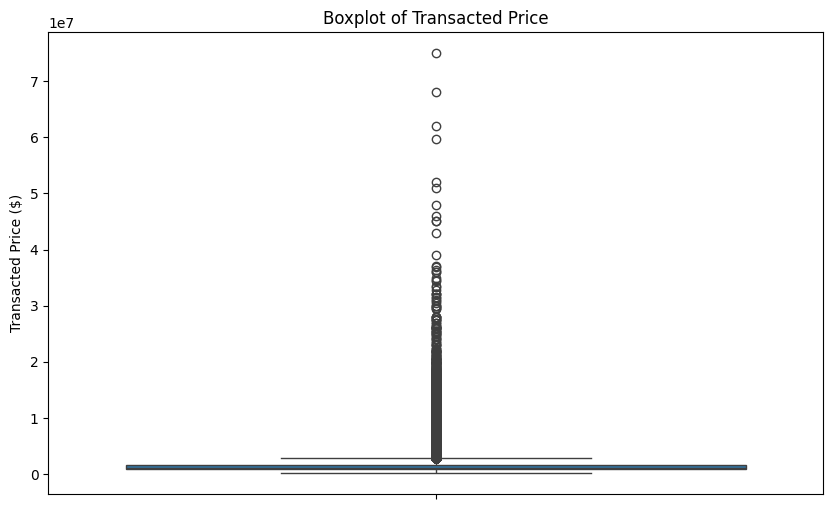

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a boxplot for 'Transacted Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Transacted Price ($)'])
plt.title('Boxplot of Transacted Price')
plt.show()

In [47]:
# Calculate Q1, Q3 and IQR
Q1 = data['Transacted Price ($)'].quantile(0.25)
Q3 = data['Transacted Price ($)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Transacted Price ($)'] >= lower_bound) & (data['Transacted Price ($)'] <= upper_bound)]

# Display the shape of the data before and after outlier removal
print("Original data shape:", data.shape)
print("Data shape after outlier removal:", data_no_outliers.shape)

Original data shape: (397289, 24)
Data shape after outlier removal: (369674, 24)


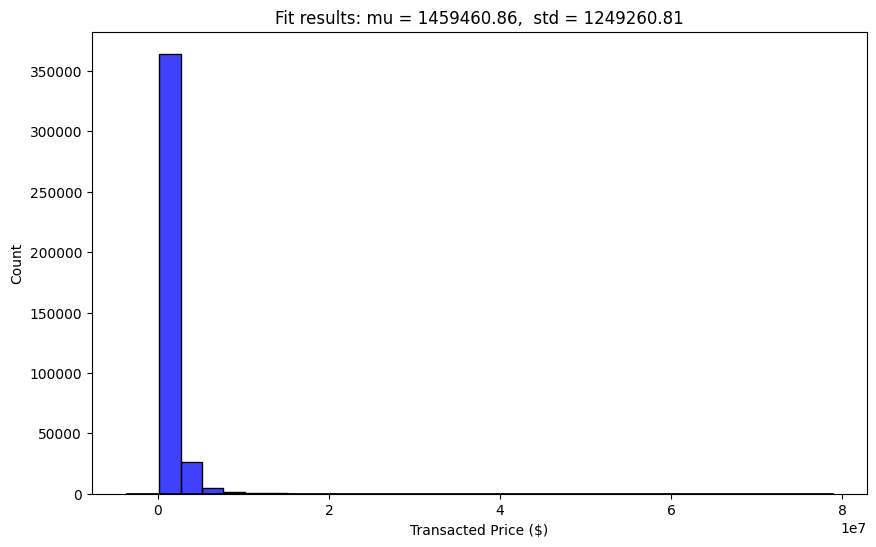

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data['Transacted Price ($)'], bins=30, kde=False, color='blue')

# Fit a normal distribution to the data:
mu, std = norm.fit(data['Transacted Price ($)'])

# Plot the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [49]:
# Calculate the histogram bin counts and edges
counts, bin_edges = np.histogram(data['Transacted Price ($)'], bins=30)

# Print the counts and bin ranges
for i in range(len(counts)):
    print(f"Transacted Price range: {bin_edges[i]} - {bin_edges[i+1]}, Count: {counts[i]}")

Transacted Price range: 160000.0 - 2654666.6666666665, Count: 364240
Transacted Price range: 2654666.6666666665 - 5149333.333333333, Count: 26015
Transacted Price range: 5149333.333333333 - 7644000.0, Count: 4639
Transacted Price range: 7644000.0 - 10138666.666666666, Count: 1339
Transacted Price range: 10138666.666666666 - 12633333.333333332, Count: 581
Transacted Price range: 12633333.333333332 - 15128000.0, Count: 213
Transacted Price range: 15128000.0 - 17622666.666666664, Count: 103
Transacted Price range: 17622666.666666664 - 20117333.333333332, Count: 56
Transacted Price range: 20117333.333333332 - 22612000.0, Count: 28
Transacted Price range: 22612000.0 - 25106666.666666664, Count: 15
Transacted Price range: 25106666.666666664 - 27601333.333333332, Count: 18
Transacted Price range: 27601333.333333332 - 30096000.0, Count: 11
Transacted Price range: 30096000.0 - 32590666.666666664, Count: 8
Transacted Price range: 32590666.666666664 - 35085333.33333333, Count: 6
Transacted Price 

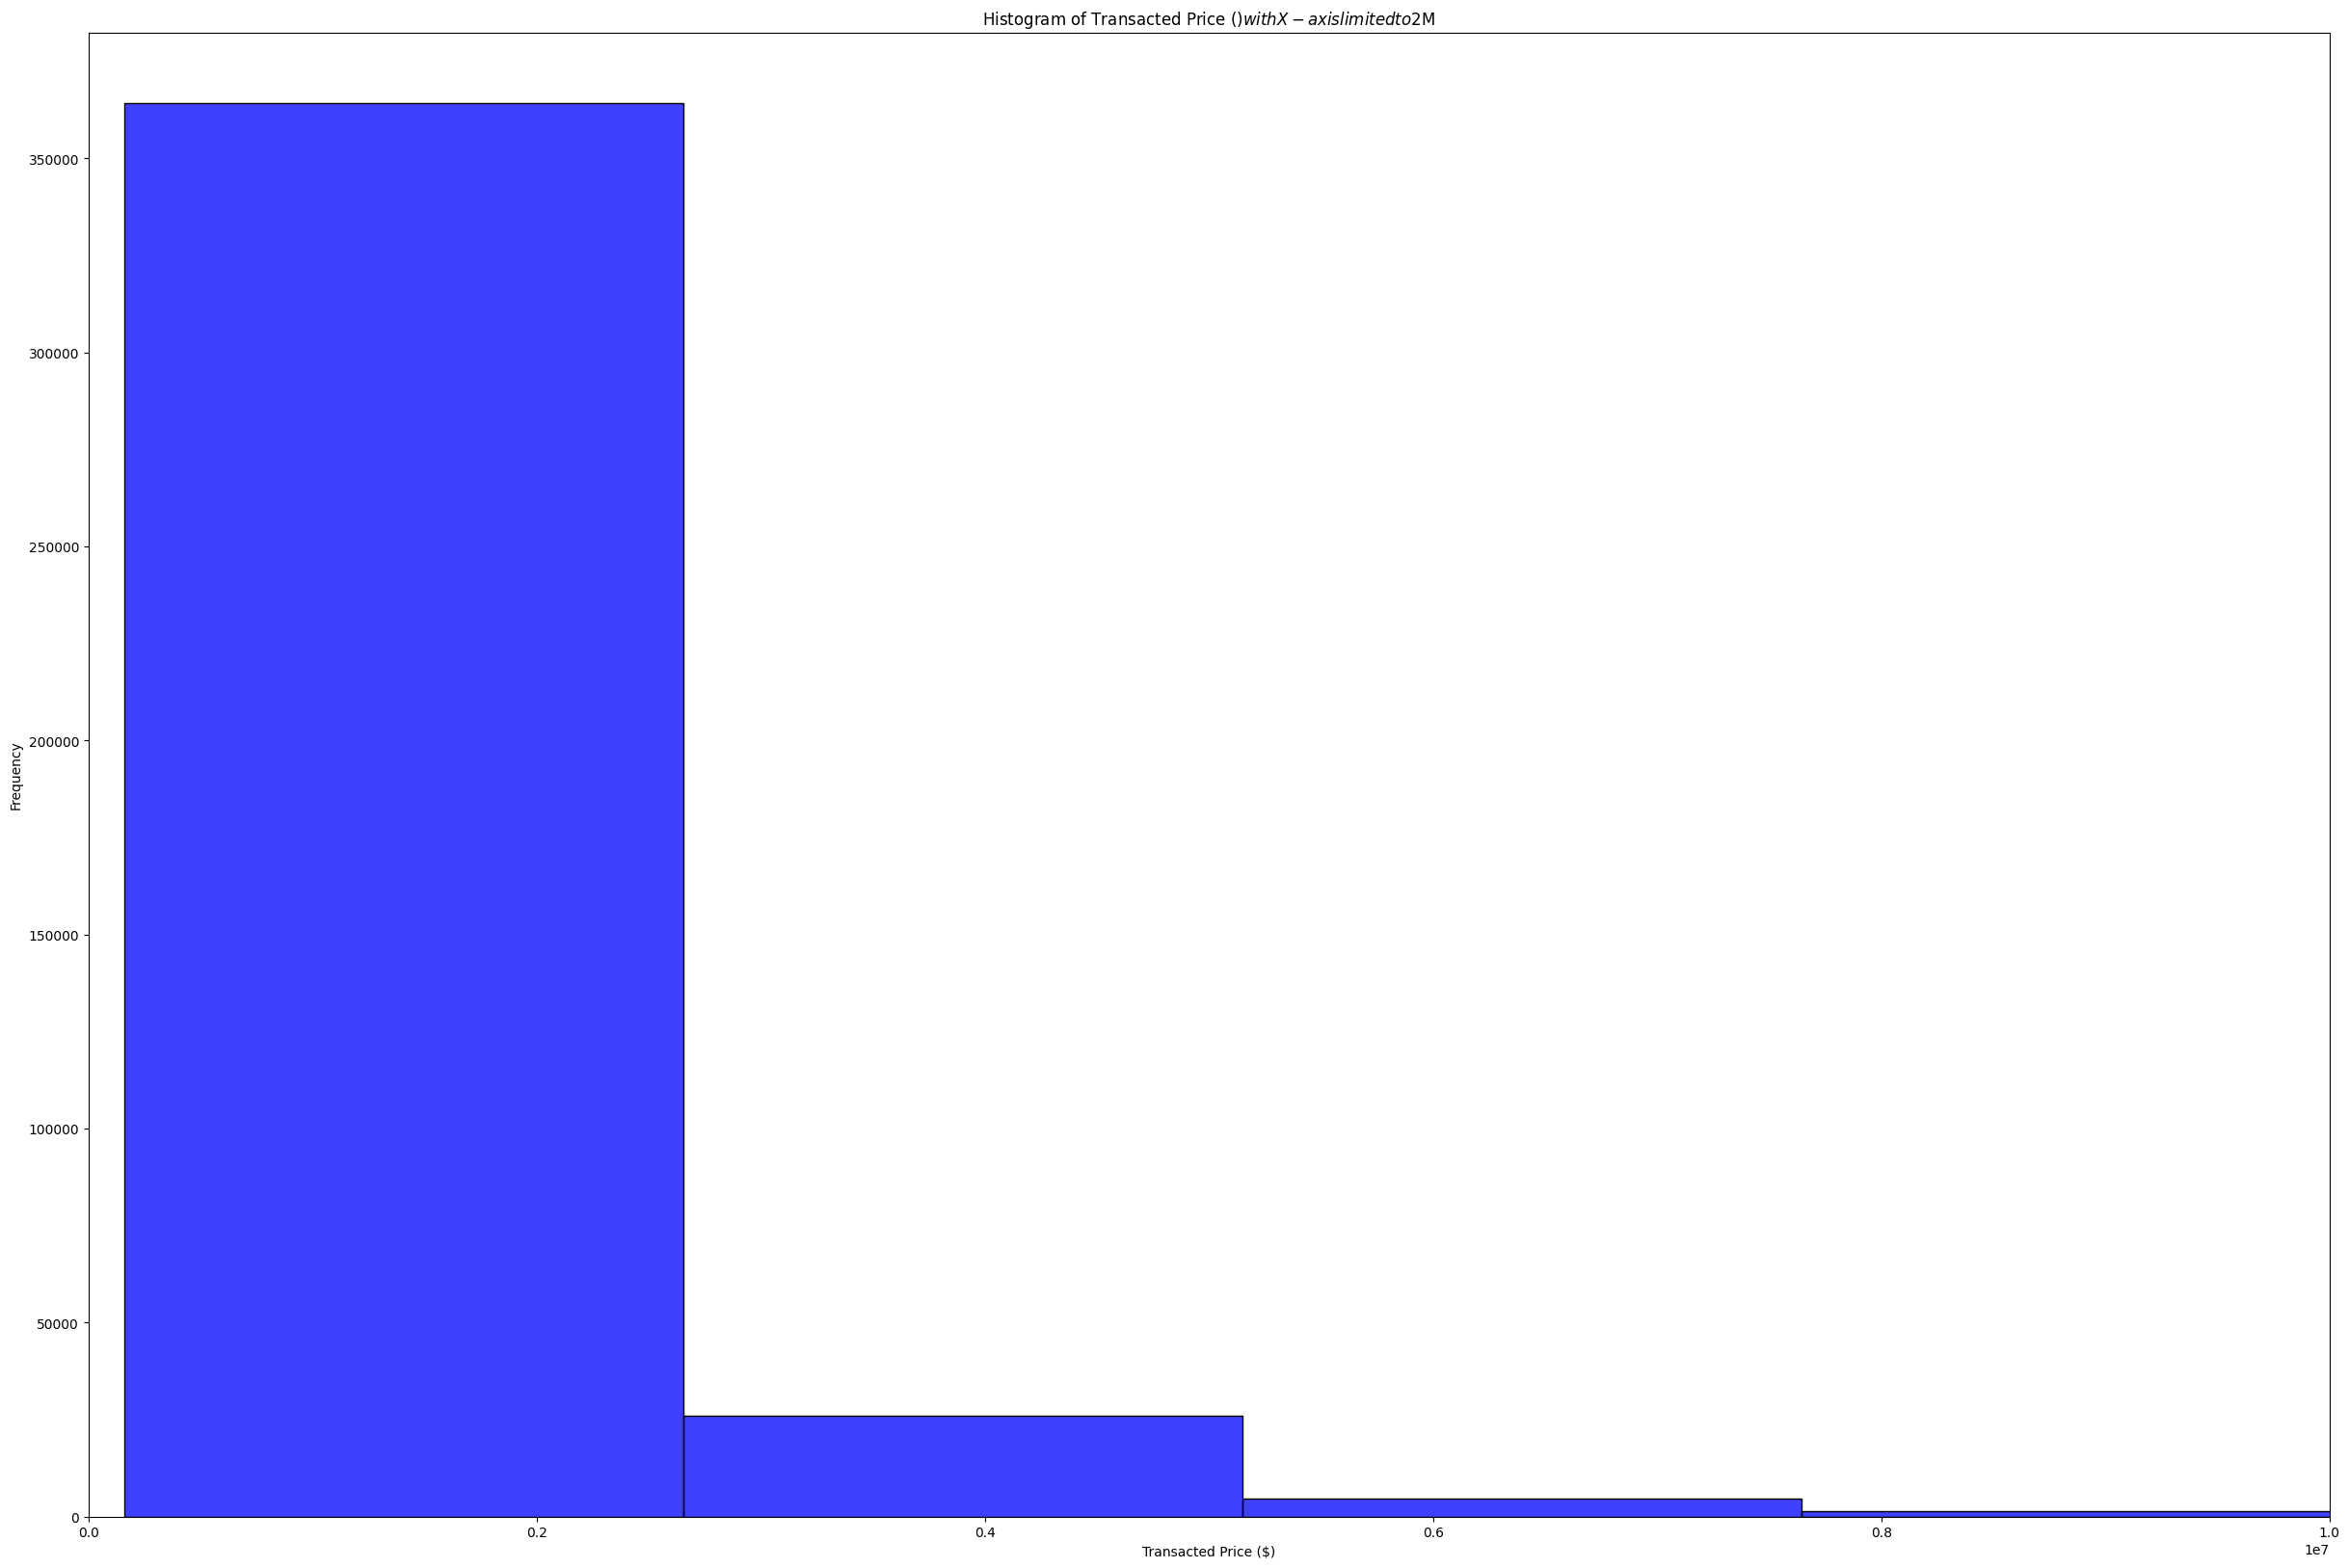

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(30, 20))

# Plot the histogram with a reduced x-axis limit
sns.histplot(data['Transacted Price ($)'], bins=30, kde=False, color='blue')
plt.xlim(0, 10e6)  # Set x-axis limit to 10 million for zoomed-in view

plt.xlabel('Transacted Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Transacted Price ($) with X-axis limited to $2M')
plt.show()

In [51]:
# # export to CSV
# data.to_csv('merged_data_v9.csv', index=False)

In [52]:
# Assuming we have already calculated the IQR and determined the upper and lower bounds for outliers previously
# We will filter the data to exclude outliers and then save it to the new CSV file

# Calculate Q1, Q3, and the IQR
Q1 = data['Transacted Price ($)'].quantile(0.25)
Q3 = data['Transacted Price ($)'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_without_outliers = data[(data['Transacted Price ($)'] >= lower_bound) & (data['Transacted Price ($)'] <= upper_bound)]

# Display the shape of the data before and after outlier removal
print("Original data shape:", data.shape)
print("Data shape after outlier removal:", data_no_outliers.shape)

Original data shape: (397289, 24)
Data shape after outlier removal: (369674, 24)


In [53]:
# # Save the data without outliers to a new CSV file named 'merged_data_v10.csv'
# data_without_outliers.to_csv('merged_data_v10.csv', index=False)

In [ ]:
# assign dataframe "data_without_outliers" to "df"
df = data_without_outliers

In [ ]:
# Deal with NaN for the "P/L ($)" and "P/L ($)"; replace them with zeroes

# Check data types of 'p/l %' and 'p/l ($)' columns
pl_percent_dtype = df['P/L (%)'].dtype
pl_dollar_dtype = df['P/L ($)'].dtype

print(f"Data type of 'P/L (%)': {pl_percent_dtype}")
print(f"Data type of 'P/L ($)': {pl_dollar_dtype}")

# Replace empty cells with 0
df['P/L (%)'] = df['P/L (%)'].fillna(0)
df['P/L ($)'] = df['P/L ($)'].fillna(0)

# Ensure the replaced zeros have the same data type
df['P/L (%)'] = df['P/L (%)'].astype(pl_percent_dtype)
df['P/L ($)'] = df['P/L ($)'].astype(pl_dollar_dtype)

In [ ]:
# # export to CSV
# df.to_csv('merged_data_v10.1.csv', index=False)

In [ ]:
# See the distribution of "P/L ($)"
# Extract the 'P/L ($)' column
pl_dollars = df['P/L ($)']

# Create a histogram
plt.figure(figsize=(15, 8))
plt.hist(pl_dollars, bins=40, edgecolor='black')

# Add titles and labels
plt.title('Histogram of P/L ($)')
plt.xlabel('P/L ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Descriptives
## Profitability of New Launches vs. Resale Properties:

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('merged_data_v10.csv')

# Converting 'Sale Date' from string to datetime data type
data['Sale Date'] = pd.to_datetime(data['Sale Date'], errors='coerce')
data.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure_start                           object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                             int64
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
Tenure_cat                             object
P/L ($)                               float64
P/L (%)                           

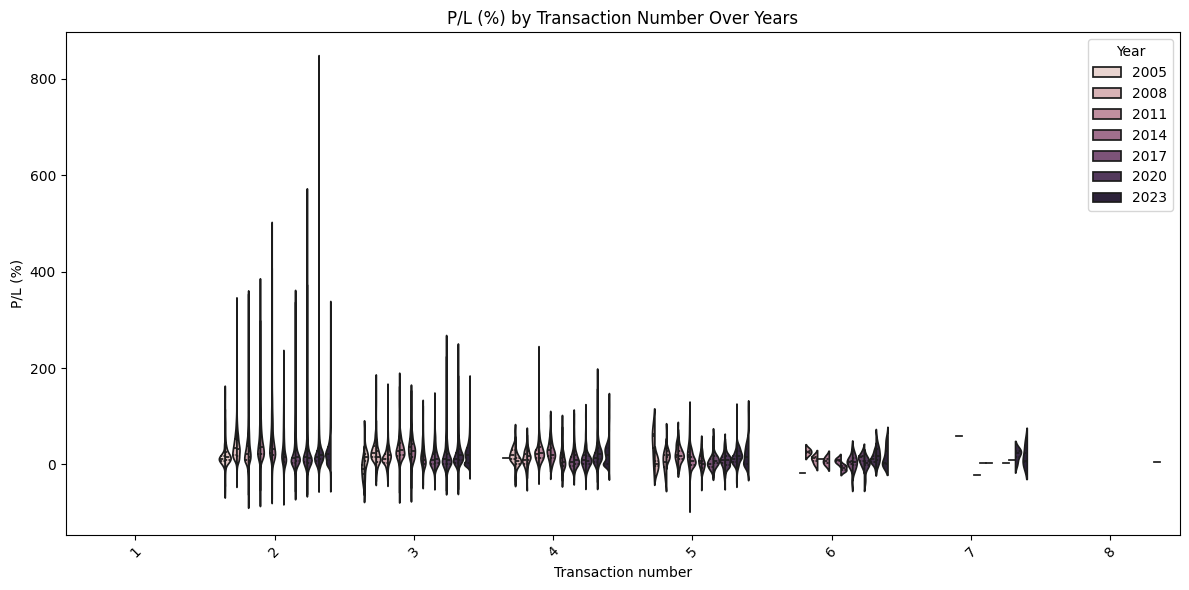

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'Sale Date'
data['Year'] = pd.to_datetime(data['Sale Date']).dt.year

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Transaction number', y='P/L (%)', hue='Year', data=data, split=True, inner='quartile')
plt.title('P/L (%) by Transaction Number Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Properties are more profitable for the first owner who is selling it to the second owner, and the % profit generally diminishes with the increasing number of ex owners.

## Value Retention: Freehold vs. Leasehold

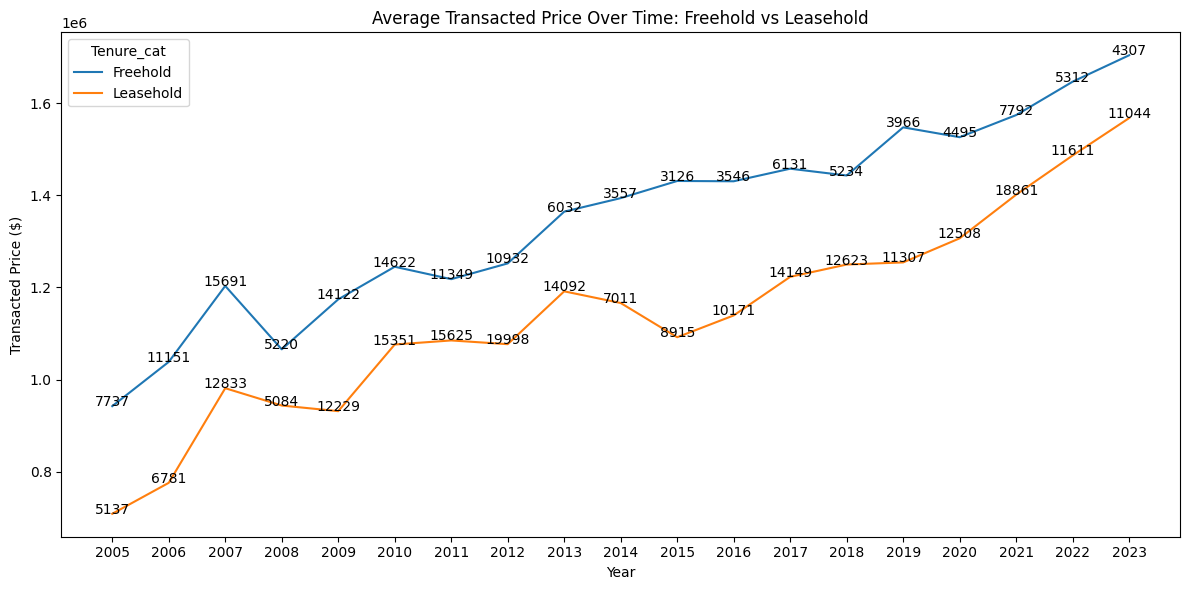

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'Sale Date'
data['Year'] = pd.to_datetime(data['Sale Date']).dt.year

# Group by year and tenure category, then calculate the average transacted price
average_prices = data.groupby(['Year', 'Tenure_cat'])['Transacted Price ($)'].mean().reset_index()

# Calculate the number of transactions for each year and tenure category
transaction_counts = data.groupby(['Year', 'Tenure_cat']).size().reset_index(name='Transaction Count')

# Merge the average prices with the transaction counts
merged_data = pd.merge(average_prices, transaction_counts, on=['Year', 'Tenure_cat'])

# Create a line plot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=merged_data, x='Year', y='Transacted Price ($)', hue='Tenure_cat')

# Annotate with the number of transactions
for _, row in merged_data.iterrows():
    lineplot.text(row['Year'], row['Transacted Price ($)'], str(row['Transaction Count']), color='black', ha="center")

# Set x-axis to show only whole number years
plt.xticks(merged_data['Year'].unique())

plt.title('Average Transacted Price Over Time: Freehold vs Leasehold')
plt.tight_layout()
plt.show()


## Transacted Price by year by Area (SQFT)

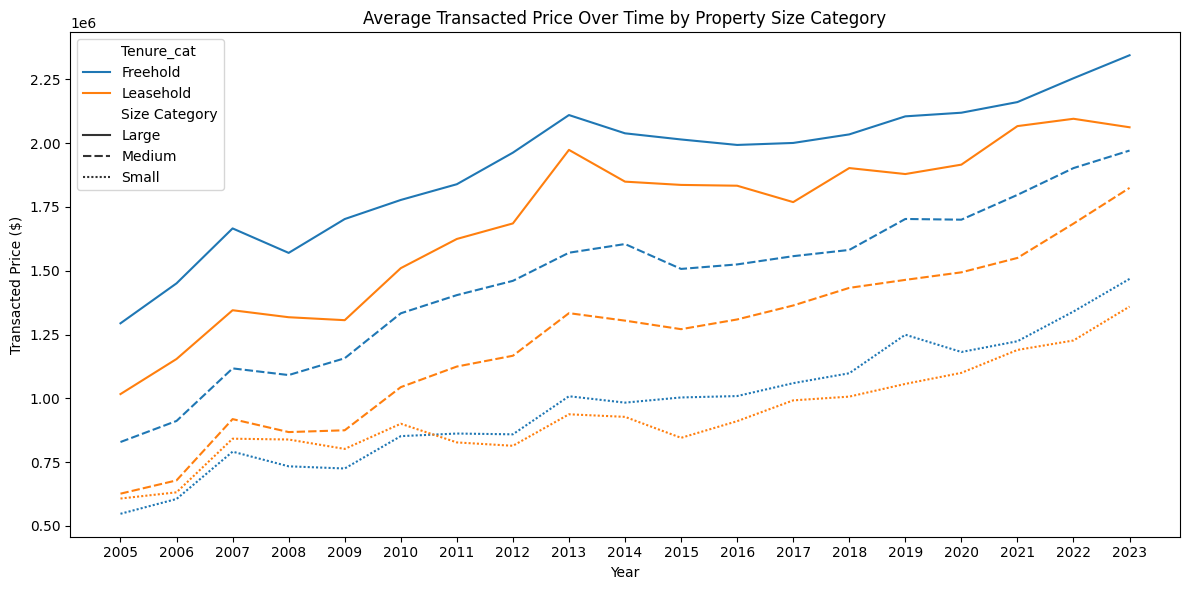

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to categorize property sizes
def categorize_size(area):
    if area < 900:  # Adjust thresholds as needed
        return 'Small'
    elif area <= 1500:
        return 'Medium'
    else:
        return 'Large'

# Apply the categorization function to the dataset
data['Size Category'] = data['Area (SQFT)'].apply(categorize_size)

# Extract the year from 'Sale Date'
data['Year'] = pd.to_datetime(data['Sale Date']).dt.year

# Group by year, tenure category, and size category, then calculate the average transacted price
average_prices = data.groupby(['Year', 'Tenure_cat', 'Size Category'])['Transacted Price ($)'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=average_prices, x='Year', y='Transacted Price ($)', hue='Tenure_cat', style='Size Category')

# Set x-axis to show only whole number years
plt.xticks(average_prices['Year'].unique())

plt.title('Average Transacted Price Over Time by Property Size Category')
plt.tight_layout()
plt.show()


### Generally, freehold properties are transacted at higher prices than leasehold ones.
### The differences in Transacted Price between Leasehold and Freehold is more pronounced for mid (900-1500 sqft) and larger sized (>1500 sqft or larger) properties, but less so for small (<900 sqft) ones. 

## Rate of Leasehold Decay in Properties Across Singapore
### Calculate the age of each property transaction: Subtract Tenure_start from the year of the transaction.
### Group by Postal District and Property Age: Calculate the average "P/L ($)" for each postal district and property age.
### Plot the results: Use a line plot to show how the average "P/L ($)" changes over the property age for each postal district.

In [92]:
data.dtypes

Project Name                           object
Transacted Price ($)                  float64
Area (SQFT)                           float64
Unit Price ($ PSF)                    float64
Sale Date                      datetime64[ns]
Address                                object
Type of Sale                           object
Type of Area                           object
Area (SQM)                            float64
Unit Price ($ PSM)                    float64
Property Type                          object
Tenure_start                           object
Completion Date                        object
Purchaser Address Indicator            object
Postal Code                             int64
Postal District                         int64
Postal Sector                           int64
Planning Region                        object
Planning Area                          object
Tenure_cat                             object
P/L ($)                               float64
P/L (%)                           

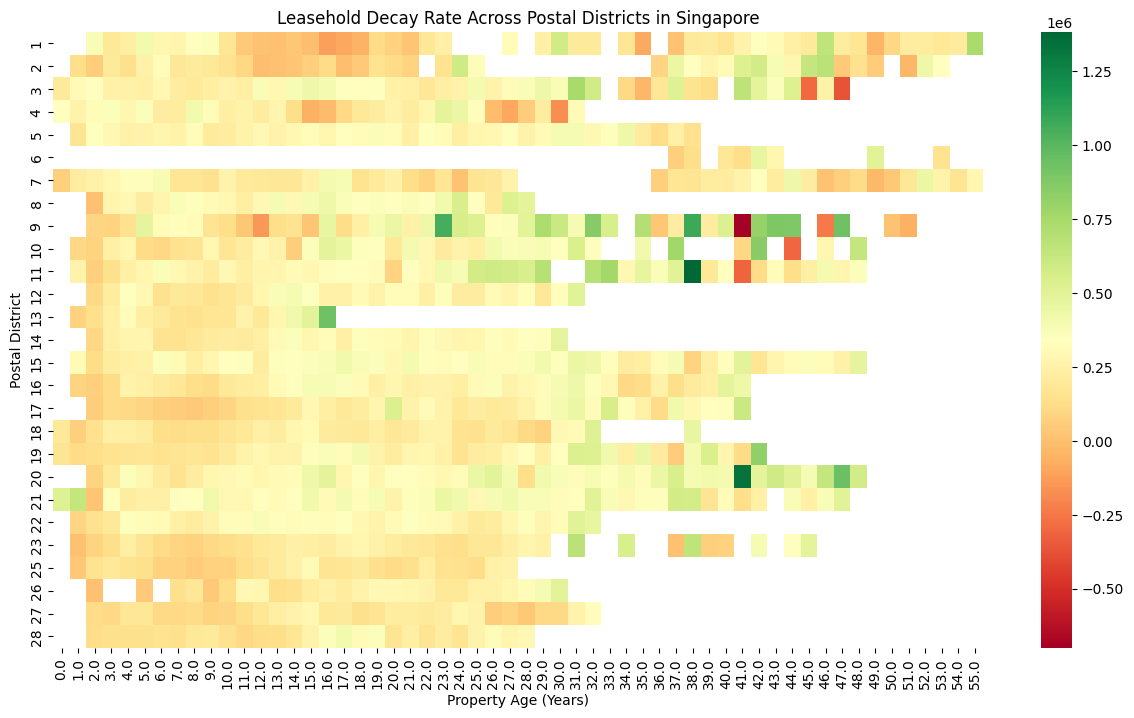

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Sale Date' to datetime and extract the year
data['Year'] = pd.to_datetime(data['Sale Date']).dt.year

# Ensure 'Tenure_start' is an integer
data['Tenure_start'] = pd.to_numeric(data['Tenure_start'], errors='coerce')

# Calculate the age of the property at the time of transaction
data['Property Age'] = data['Year'] - data['Tenure_start']

# Filter for only leasehold properties
leasehold_data = data[data['Tenure_cat'] == 'Leasehold']

# Group by Postal District and Property Age, then calculate the average P/L ($)
average_pl = leasehold_data.groupby(['Postal District', 'Property Age'])['P/L ($)'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(average_pl, cmap='RdYlGn', annot=False, fmt=".0f")
plt.title('Leasehold Decay Rate Across Postal Districts in Singapore')
plt.xlabel('Property Age (Years)')
plt.ylabel('Postal District')
plt.show()

### Leasehold decay rates are similar across most postal districts (yellow). However, for districts 9 (Orchard, Cairnhill, River Valley), 10 (Ardmore, Bukit Timah, Holland Road, Tanglin), 11 (Watten Estate, Novena, Thomson) and 20 (Bishan, Ang Mo Kio), we notice more green (increase in value) of properties that are older (28 - 48 years from the start of the lease year). In other words, in these estates, older leasehold properties have demonstrated good value retention despite lease decay.

In [ ]:
# Load the provided CSV file to examine its contents
file_path = 'merged_data_v10.1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for freehold and leasehold properties
freehold = df[df['Tenure_cat'] == 'Freehold']
leasehold = df[df['Tenure_cat'] == 'Leasehold']

# Calculate average P/L (%) for both freehold and leasehold
avg_pl_freehold = freehold['P/L (%)'].mean()
avg_pl_leasehold = leasehold['P/L (%)'].mean()

# Prepare data for plotting
data = {'Tenure Type': ['Freehold', 'Leasehold'],
        'Average P/L (%)': [avg_pl_freehold, avg_pl_leasehold]}

# Convert to DataFrame
pl_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure Type', y='Average P/L (%)', data=pl_df)
plt.title('Average Profit/Loss (%) for Freehold vs Leasehold Properties')
plt.ylabel('Average Profit/Loss (%)')
plt.xlabel('Tenure Type')
plt.show()

In [ ]:
# Slicing the average P/L (%) by freehold vs leasehold and also by district

# Grouping the data by Tenure and Postal District and calculating average P/L (%)
grouped_data = df.groupby(['Tenure_cat', 'Postal District'])['P/L (%)'].mean().reset_index()

# Pivot the data for better visualization
pivot_data = grouped_data.pivot(index='Postal District', columns='Tenure_cat', values='P/L (%)')

# Reset index for plotting
pivot_data.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='Postal District', y='P/L (%)', hue='Tenure_cat', data=grouped_data)
plt.title('Average Profit/Loss (%) by Freehold vs Leasehold and by District')
plt.ylabel('Average Profit/Loss (%)')
plt.xlabel('Postal District')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Tenure Type')
plt.show()